In [1]:
import h5py
import glob
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [2]:
files1 = glob.glob("/home/bbbam/boosted_tau_classifier_4ch/INFERENCE_DATA/*/*")

files2 = glob.glob("/home/bbbam/boosted_tau_classifier_13ch/INFERENCE_DATA/*/*")

files3 = glob.glob("/home/bbbam/5_channel_boosted_tau_classifier_ResNet_3/INFERENCE_DATA/*")

print(len(files1),len(files2), len(files3))
print(files1[-1],files2[-1],files3[-1])

14 15 1
/home/bbbam/boosted_tau_classifier_4ch/INFERENCE_DATA/4_boosted_tau_classifier_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs16_BatchSize1024_from14_ntrain4242432_nval856064_run0/metrics_epoch16_auc0.9814.hdf5 /home/bbbam/boosted_tau_classifier_13ch/INFERENCE_DATA/13_boosted_tau_classifier_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs19_BatchSize1024_from11_ntrain4242432_nval856064_run0/metrics_epoch21_auc0.9856.hdf5 /home/bbbam/5_channel_boosted_tau_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch28_auc0.9822.hdf5


In [3]:
def roc_curve(file_path1, file_path2, file_path3):
    print(file_path1)
    print(file_path2)
    print(file_path3)
    with h5py.File(file_path1, 'r') as file1:
        fpr1 = file1['fpr'][()]  
        tpr1 = file1['tpr'][()]
        y_pred1 = file1['y_pred'][()]
        y_truth1 = file1['y_truth'][()]
    with h5py.File(file_path2, 'r') as file2:
        fpr2 = file2['fpr'][()]  
        tpr2 = file2['tpr'][()]
        y_pred2 = file2['y_pred'][()]
        y_truth2 = file2['y_truth'][()]
        
    with h5py.File(file_path3, 'r') as file3:
        fpr3 = file3['fpr'][()]  
        tpr3 = file3['tpr'][()]
        y_pred3 = file3['y_pred'][()]
        y_truth3 = file3['y_truth'][()]
        
    fig, ax = plt.subplots(figsize=(10,10))
    
    plt.plot(fpr2, tpr2, color='red', lw=2, label=f'ROC curve 13 ch: AUC={np.round(auc(fpr2, tpr2),4)}')
    plt.plot(fpr3, tpr3, color='green', lw=2, label=f'ROC curve 5 ch: AUC={np.round(auc(fpr3, tpr3),4)}')
    plt.plot(fpr1, tpr1, color='blue',linestyle='--', lw=2, label=f'ROC curve 4 ch: AUC={np.round(auc(fpr1, tpr1),4)}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show()

   

/home/bbbam/boosted_tau_classifier_4ch/INFERENCE_DATA/4_boosted_tau_classifier_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs16_BatchSize1024_from14_ntrain4242432_nval856064_run0/metrics_epoch16_auc0.9814.hdf5
/home/bbbam/boosted_tau_classifier_13ch/INFERENCE_DATA/13_boosted_tau_classifier_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs19_BatchSize1024_from11_ntrain4242432_nval856064_run0/metrics_epoch21_auc0.9856.hdf5
/home/bbbam/5_channel_boosted_tau_classifier_ResNet_3/INFERENCE_DATA/metrics_epoch28_auc0.9822.hdf5


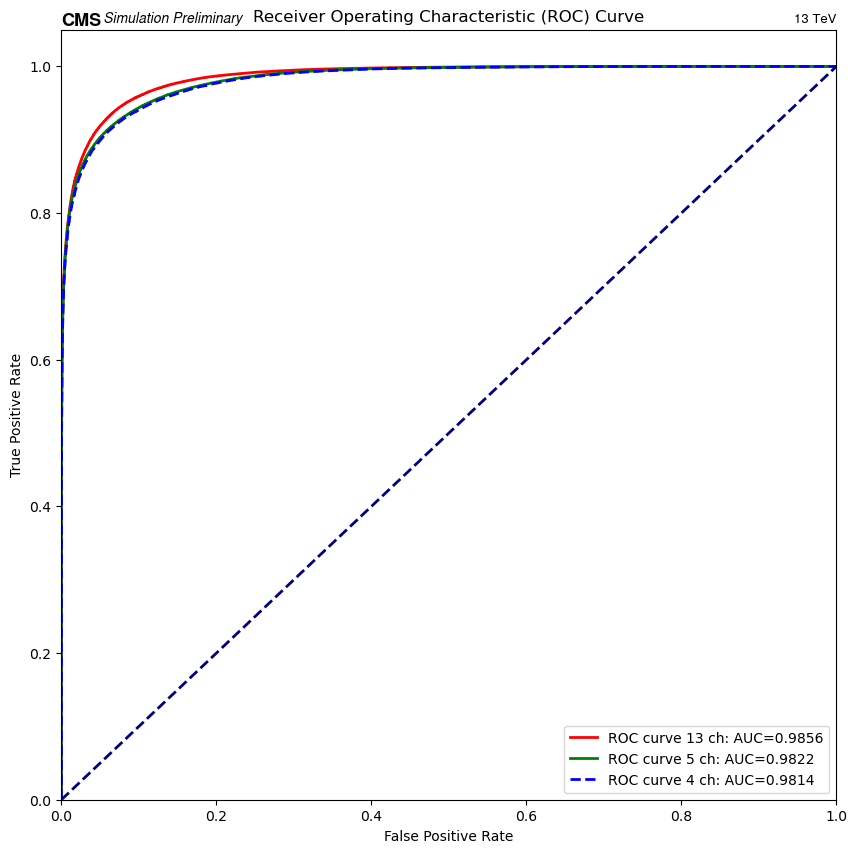

In [4]:
roc_curve(files1[-1], files2[-1], files3[-1])

Accuracy: 89.84%
Precision: 92.17%
Recall: 87.24%
F1 Score: 89.64%
Confusion Matrix:
[[392855  31948]
 [ 55026 376235]]


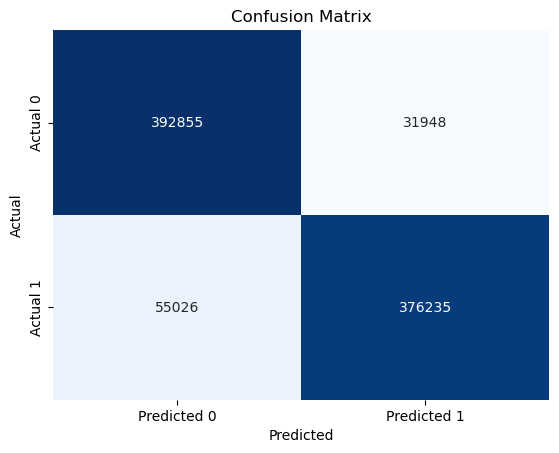

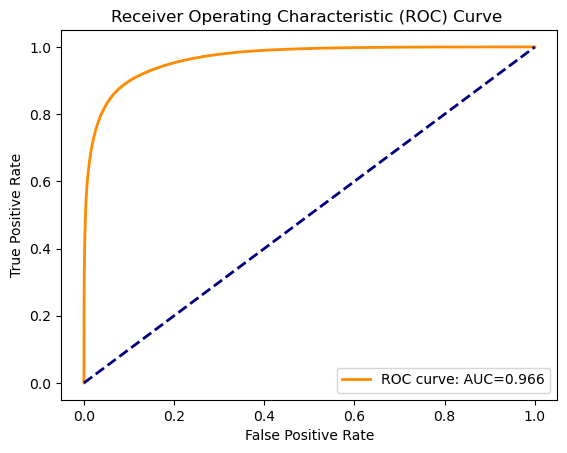

In [5]:

# Example true and predicted values
with h5py.File(files1[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


Accuracy: 90.76%
Precision: 89.77%
Recall: 92.16%
F1 Score: 90.95%
Confusion Matrix:
[[379346  45315]
 [ 33820 397583]]


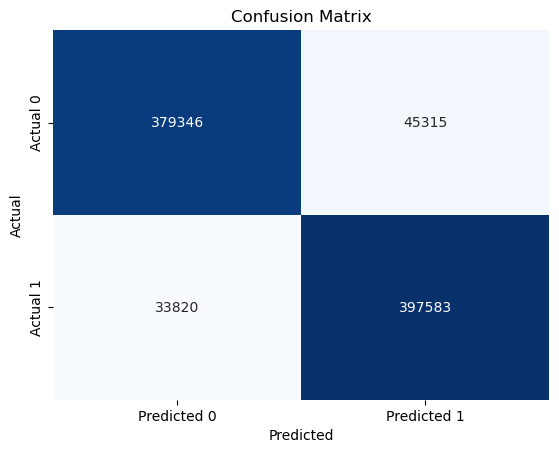

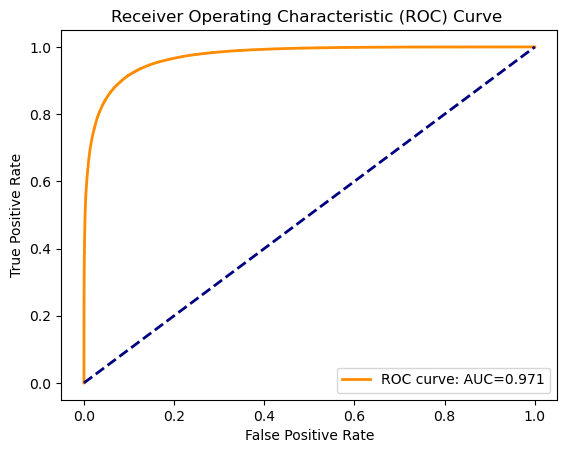

In [6]:
# Example true and predicted values
with h5py.File(files2[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])
y_pred = np.squeeze(np.array([1 if true > 0.5 else 0 for true in y_pred]))


        
#Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2%}")

# Calculate recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Calculate F1 score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Calculate ROC-AUC score

# Plot ROC curve
# fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve: AUC={np.round(auc(fpr, tpr),3)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


In [10]:
files1 = glob.glob("/home/bbbam/boosted_tau_classifier_4ch/INFERENCE_DATA/*/*")
with h5py.File(files1[0], 'r') as file1:
        fpr = np.squeeze(file1['fpr'][()])  
        tpr = np.squeeze(file1['tpr'][()])
        y_pred = np.squeeze(file1['y_pred'][()])
        y_true = np.squeeze(file1['y_truth'][()])

In [16]:
pred_signal=[]
pred_back=[]
for i in range(len(y_pred)):
    if y_true[i]==0:
        pred_back.append(y_pred[i])
    else:
        pred_signal.append(y_pred[i])

In [18]:
len(pred_back),len(pred_signal)

(424803, 431261)

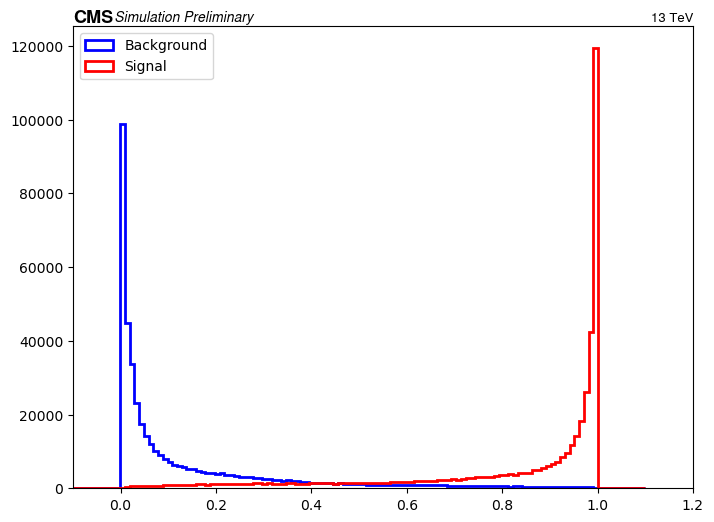

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(pred_back, range=(-0.1,1.1), bins=len(np.arange(-0.1,1.1,0.01)), histtype='step', label='Background', linestyle='-', color='blue', linewidth=2)
plt.hist(pred_signal, range=(-0.1,1.1), bins=len(np.arange(-0.1,1.1,0.01)), histtype='step', label='Signal', linestyle='-', color='Red', linewidth=2)
plt.xlim(-0.1,1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,0.4),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [24]:
min(pred_back)

0.0